In [37]:
import numpy as np 
import pandas as pd 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

In [38]:
df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('validation.csv')
# df_test = pd.read_csv('test.csv')

In [39]:
var_columns = [c for c in df_train.columns if c not in ['profit_margin']]

x_train = df_train.loc[:,var_columns]
y_train = df_train.loc[:,'profit_margin']

x_valid = df_valid.loc[:,var_columns]
y_valid = df_valid.loc[:,'profit_margin']


In [40]:
# baseline
gbModel_baseline = GradientBoostingRegressor(random_state=42)
gbModel_baseline.fit(x_train, y_train)
y_pred_base = gbModel_baseline.predict(x_valid)

y_actual = df_valid['profit_margin'].to_numpy()

results = pd.DataFrame({"predicted":y_pred_base, "actual":y_actual}).sort_values('actual')
num_neg = 0
for i in results['predicted']:
    if i < 0:
        num_neg += 1
print(num_neg)
print(results.to_string())

MSE = mean_squared_error(y_actual, y_pred_base)
print(f'Baseline MSE: {MSE}')

RMSE = math.sqrt(MSE)
print(f'Baseline RMSE: {RMSE}')

MAE = mean_absolute_error(y_actual, y_pred_base)
print(f'Baseline MAE: {MAE}')

0
     predicted    actual
382   1.265994  0.007227
675   2.003792  0.008107
122   1.122868  0.008601
464   1.223592  0.009240
746   1.016383  0.012468
522   1.106803  0.013886
651   1.396151  0.015807
451   1.749545  0.019444
113   1.066492  0.020677
187   0.993964  0.026177
378   1.101738  0.029051
61    0.827083  0.030042
301   1.564430  0.030197
320   1.681840  0.033391
290   2.105727  0.034912
646   0.878905  0.035054
151   0.632552  0.041257
235   1.538198  0.044722
505   1.262359  0.046228
230   1.506745  0.049348
750   1.803137  0.050153
317   0.982249  0.053695
679   1.281765  0.062343
418   1.145158  0.066957
521   0.780249  0.072066
620   1.390625  0.073696
700   1.763671  0.075243
116   1.051479  0.078509
514   1.381292  0.079191
600   0.246101  0.079828
394   1.458097  0.080813
4     1.940930  0.088399
70    1.385989  0.096521
135   1.260830  0.104659
391   1.651039  0.104908
432   1.819508  0.107789
656   1.767506  0.108056
456   1.005014  0.110803
250   1.102788  0.12324

In [47]:
# changed
gbModel = GradientBoostingRegressor(random_state=42, loss='huber', learning_rate=0.01, n_estimators=2000)
gbModel.fit(x_train, y_train)
y_pred_changed = gbModel.predict(x_valid)

y_actual = df_valid['profit_margin'].to_numpy()

results = pd.DataFrame({"predicted":y_pred_changed, "actual":y_actual}).sort_values('actual')
num_neg = 0
counter = 0
for i in results['predicted']:
    if i < 0:
        num_neg += 1
        results.at[0, 'predicted'] = 0
print(num_neg)
# print(results.to_string())

MSE = mean_squared_error(y_actual, y_pred_changed)
print(f'Changed MSE: {MSE}')

RMSE = math.sqrt(MSE)
print(f'Changed RMSE: {RMSE}')

MAE = mean_absolute_error(y_actual, y_pred_changed)
print(f'Changed MAE: {MAE}')

1
Changed MSE: 0.36155573503591587
Changed RMSE: 0.6012950482383136
Changed MAE: 0.46558839842541666


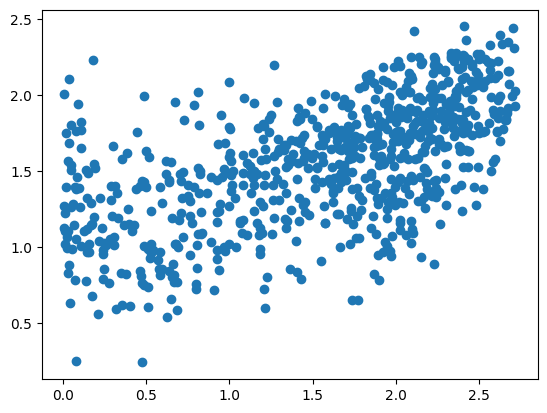

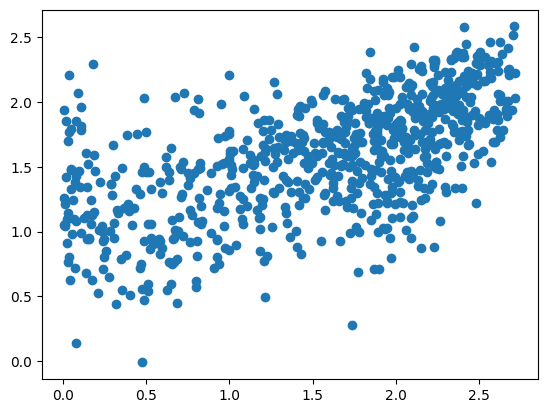

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_actual, y_pred_base)
plt.show()
plt.scatter(y_actual, y_pred_changed)
plt.show()

In [42]:
features_importance  = pd.DataFrame({'Variable_Name':var_columns, 'Importance':gbModel.feature_importances_}).sort_values('Importance', ascending=False)

print(features_importance.to_string())

              Variable_Name  Importance
4                vote_count    0.345514
1                    budget    0.342738
3              vote_average    0.073000
0                popularity    0.049373
2                   runtime    0.029650
40           genres: Comedy    0.019143
25            genres: Drama    0.010841
71     original_language_zh    0.010681
47                month: 09    0.009436
60     original_language_fr    0.009374
38  genres: Science Fiction    0.007370
39           genres: Horror    0.006664
31          genres: Fantasy    0.005442
61     original_language_hi    0.004329
37           genres: Family    0.004111
62     original_language_it    0.003321
36           genres: Action    0.003286
55                month: 06    0.003167
26         genres: Thriller    0.003122
50                month: 03    0.003120
69     original_language_te    0.002780
58     original_language_en    0.002652
64     original_language_ko    0.002566
49                month: 07    0.002539


In [48]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 5

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

scores = cross_val_score(gbModel, x_valid, y_valid, cv=kf)
mean_score = scores.mean()
print('Mean Cross-validation Score: ', mean_score)

Mean Cross-validation Score:  0.2401278922108112


In [44]:
print(scores)

[0.21462015 0.19739079 0.24776341 0.26480625 0.27605886]
